In [14]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Salary_dataset.csv')

# Display the DataFrame
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Linear Regression on Salary Dataset

In this notebook, we are performing linear regression on the salary dataset. The dataset contains information about the years of experience and the corresponding salary for different individuals.

We will now create a plot to visualize the relationship between years of experience and salary.

<Axes: title={'center': 'Years of Experience vs Salary'}, xlabel='YearsExperience', ylabel='Salary'>

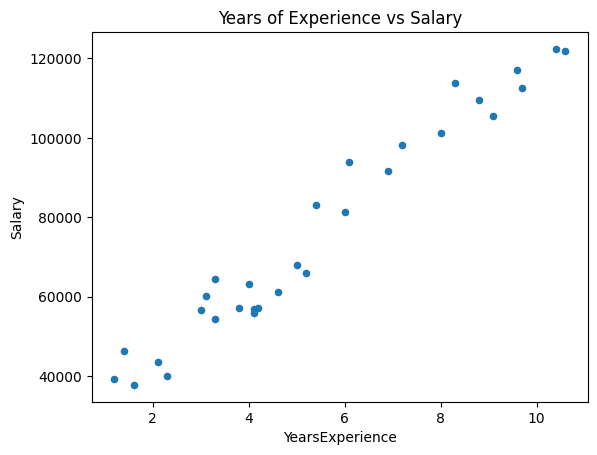

In [15]:
df.plot(kind='scatter', x='YearsExperience', y='Salary', title='Years of Experience vs Salary')

## Linear Regression Model

Next, we will create a linear regression model to predict the salary based on years of experience. We will use gradient descent to calculate the cost function and update the model parameters.

### Steps:
1. Initialize the model parameters (weights and bias).
2. Define the cost function (Mean Squared Error).
3. Implement the gradient descent algorithm to minimize the cost function.
4. Train the model using the training data.
5. Evaluate the model performance on the test data.

Model parameters: theta0 = 21912.58918422329, theta1 = 9880.814004608217


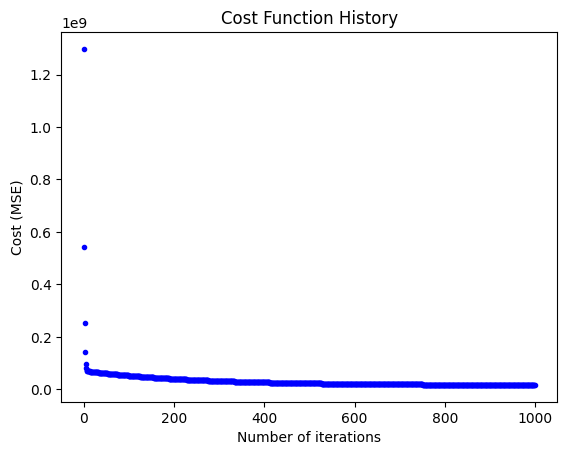

In [16]:
import numpy as np

# Initialize model parameters
theta0 = 0  # bias
theta1 = 0  # weight
learning_rate = 0.01
num_iterations = 1000

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta0, theta1):
    m = len(y)
    predictions = theta0 + theta1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement the gradient descent algorithm
def gradient_descent(X, y, theta0, theta1, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = theta0 + theta1 * X
        theta0 = theta0 - (learning_rate / m) * np.sum(predictions - y)
        theta1 = theta1 - (learning_rate / m) * np.sum((predictions - y) * X)
        cost_history[i] = compute_cost(X, y, theta0, theta1)
    
    return theta0, theta1, cost_history

# Prepare the data
X = df['YearsExperience'].values
y = df['Salary'].values

# Train the model
theta0, theta1, cost_history = gradient_descent(X, y, theta0, theta1, learning_rate, num_iterations)

print(f"Model parameters: theta0 = {theta0}, theta1 = {theta1}")

# Plot the cost function history
import matplotlib.pyplot as plt

plt.plot(range(num_iterations), cost_history, 'b.')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function History')
plt.show()

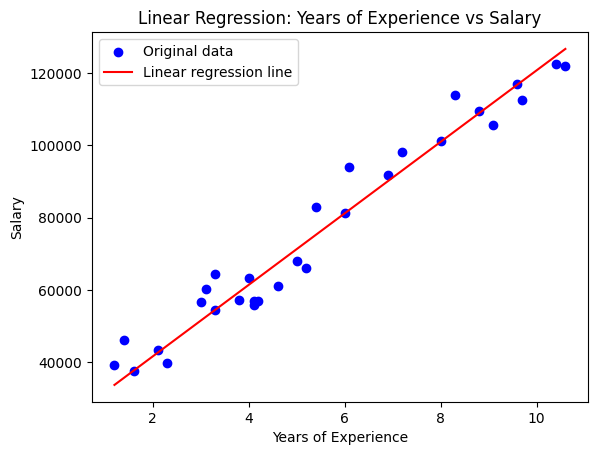

In [17]:
# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the linear regression line
regression_line = theta0 + theta1 * X
plt.plot(X, regression_line, color='red', label='Linear regression line')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.legend()

# Show the plot
plt.show()

In [18]:
def predict_salary(years_experience, theta0, theta1):
    return theta0 + theta1 * years_experience

# Example usage:
years_experience = 5  # You can change this value to test with different years of experience
predicted_salary = predict_salary(years_experience, theta0, theta1)
print(f"Predicted salary for {years_experience} years of experience: ${predicted_salary:.2f}")

Predicted salary for 5 years of experience: $71316.66


## Using scikit-learn for Linear Regression

Now that we have implemented linear regression using pure Python, we will use the `scikit-learn` library to perform linear regression. This will allow us to compare the results and see how using a library can simplify the process.

### Steps:
1. Import the necessary modules from `scikit-learn`.
2. Create a linear regression model.
3. Train the model using the training data.
4. Make predictions using the trained model.
5. Evaluate the model performance.

Mean Squared Error: 31270951.722280953
R-squared: 0.9569566641435086


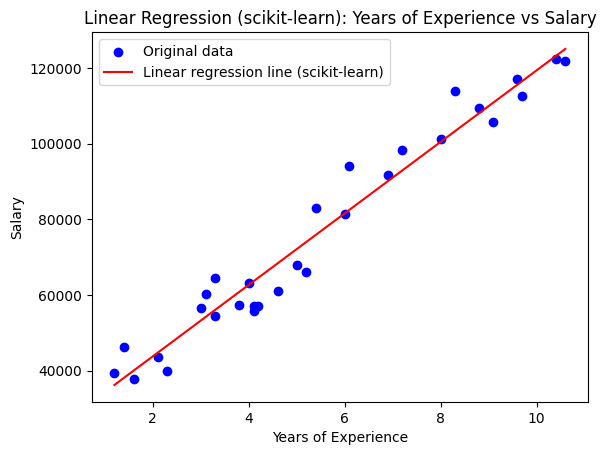

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Reshape the data to fit the model
X_reshaped = X.reshape(-1, 1)

# Train the model using the training data
model.fit(X_reshaped, y)

# Make predictions using the trained model
y_pred = model.predict(X_reshaped)

# Evaluate the model performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the linear regression line
plt.plot(X, y_pred, color='red', label='Linear regression line (scikit-learn)')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression (scikit-learn): Years of Experience vs Salary')
plt.legend()

# Show the plot
plt.show()